<a href="https://colab.research.google.com/github/Emanuel-Acosta/challege-telecom-X1/blob/main/challenge_telecom_X1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

El presente análisis tiene como objetivo identificar patrones asociados a la evasión (churn) de clientes en la empresa TelecomX. El fenómeno de evasión representa una pérdida directa de ingresos y posibles oportunidades futuras, por lo cual entender sus causas es clave para el negocio.

A través de técnicas de análisis exploratorio y visualizaciones, se busca comprender qué variables están más relacionadas con la cancelación del servicio por parte de los clientes.


#📌 1-Extracción

In [27]:
import requests
import pandas as pd

# ✅ URL CORRECTA del archivo JSON (versión raw del contenido)
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Obtiene los Datos
response = requests.get(url)

# Carga los Datos JSON
data = response.json()

# Crea el DataFrame
df_telecomx1 = pd.DataFrame(data)

# Muestra las Primeras Filas
print(df_telecomx1.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [28]:
# 3 filas aleatorias
df_telecomx1.sample(3)

,customerID,Churn,customer,phone,internet,account
3675,5063-IUOKK,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
6706,9233-PSYHO,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
2438,3402-XRIUO,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🧹 Limpieza y Tratamiento de Datos

En esta sección se detalla cómo se importaron los datos desde una API de GitHub y los pasos de limpieza realizados:
- Normalización del JSON en un DataFrame estructurado.
- Revisión de valores nulos, vacíos y duplicados.
- Conversión de variables numéricas mal tipadas.
- Estandarización de variables categóricas tipo 'Yes/No'.
- Renombramiento de columnas para mejorar su comprensión.

In [29]:
# Muestra la estructura del DataFrame: número de filas, columnas, tipos de datos y valores no nulos
df_telecomx1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [30]:
# Muestra el tipo de dato de cada columna del DataFrame
df_telecomx1.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [31]:
 # Genera estadísticas descriptivas para las columnas numéricas (media, desviación, min, max, etc.)
df_telecomx1.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


## Normalizando

In [32]:
from pandas import json_normalize

# Aplana estructuras anidadas del JSON en columnas
df_telecomx1_normalized = json_normalize(data)

# Muestra la estructura del DataFrame resultante
df_telecomx1_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [33]:
# Muestra las últimas 5 filas del DataFrame normalizado
df_telecomx1_normalized.tail(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


## Numeros Duplicados

In [34]:
# Validar si hay numeros duplicado
duplicados = df_telecomx1_normalized.duplicated()
print(duplicados.sum())

0


## Valores Nulos

In [35]:
# Contar y mostrar las columnas que tienen valores nulos junto con su cantidad
valores_nulos = df_telecomx1_normalized.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


## Valores en Blanco o Vacios

In [36]:
# Validar si hay valores en blanco o vacíos en las columnas
valores_vacios = df_telecomx1_normalized.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

Churn                    224
account.Charges.Total     11
dtype: int64


In [60]:
# Eliminar filas donde 'Churn' esté vacío o nulo
df_telecomx1 = df_telecomx1_normalized[df_telecomx1_normalized['Churn'].astype(str).str.strip() != ''].copy()

# Convertir 'account.Charges.Total' a numérico
df_telecomx1['account.Charges.Total'] = pd.to_numeric(df_telecomx1['account.Charges.Total'], errors='coerce')

# Imputar valores nulos con la mediana
median_charge = df_telecomx1['account.Charges.Total'].median()
df_telecomx1['account.Charges.Total'] = df_telecomx1['account.Charges.Total'].fillna(median_charge)

# Validación final
print(f"Filas después de limpiar: {df_telecomx1.shape[0]}")
print(f"Valores nulos restantes en 'account.Charges.Total': {df_telecomx1['account.Charges.Total'].isnull().sum()}")
print(f"Valores vacíos restantes en 'Churn': {(df_telecomx1['Churn'].astype(str).str.strip() == '').sum()}")


Filas después de limpiar: 7043
Valores nulos restantes en 'account.Charges.Total': 0
Valores vacíos restantes en 'Churn': 0


## Manejo de inconsistencias

### Renombrado de columnas

In [41]:
# Renombrar columnas a nombres en español para mejor comprensión
df_telecomx1.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Adulto_Mayor",
    "customer.Partner": "Tiene_Pareja",
    "customer.Dependents": "Tiene_Dependientes",
    "customer.tenure": "Meses_Contrato",
    "phone.PhoneService": "Suscripcion_Servicio_Telefono",
    "phone.MultipleLines": "Suscripcion_Multiples_Lineas",
    "internet.InternetService": "Suscripcion_Servicio_Internet",
    "internet.OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "internet.OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "internet.DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "internet.TechSupport": "Suscripcion_Soporte_Técnico",
    "internet.StreamingTV": "Suscripcion_TV_Streaming",
    "internet.StreamingMovies": "Suscripcion_Películas_Streaming",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electronica",
    "account.PaymentMethod": "Metodo_Pago",
    "account.Charges.Monthly": "Factura_Mensual",
    "account.Charges.Total": "Cargos_Totales"
}, inplace=True)

df_telecomx1.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [42]:
# 1. Estandarizar columnas binarias tipo "Yes/No", convertir a minúsculas y quitar espacios
cols_binarias = [
    'Cancelacion', 'Tiene_Pareja', 'Tiene_Dependientes', 'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas', 'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming', 'Suscripcion_Películas_Streaming', 'Factura_Electronica'
]

for col in cols_binarias:
    df_telecomx1[col] = df_telecomx1[col].astype(str).str.lower().str.strip()

# 2. Convertir columnas numéricas que están como texto
cols_numericas = ['Factura_Mensual', 'Cargos_Totales', 'Meses_Contrato']

for col in cols_numericas:
    df_telecomx1[col] = pd.to_numeric(df_telecomx1[col], errors='coerce')

# 3. Reemplazar valores especiales que complican el análisis
# Ejemplo: tratar "no phone service" como "no"
df_telecomx1['Suscripcion_Multiples_Lineas'] = df_telecomx1['Suscripcion_Multiples_Lineas'].replace(
    'no phone service', 'no'
)

# 4. Normalizar nombres de columnas: reemplazar puntos por guiones bajos (si todavía hay)
df_telecomx1.columns = df_telecomx1.columns.str.replace('.', '_', regex=False)

# 5. Confirmar que todo se aplicó correctamente
print("Revisión final de tipos de datos:\n")
print(df_telecomx1.dtypes)

print("\nValores únicos de algunas columnas categóricas:\n")
for col in cols_binarias:
    print(f"{col}: {df_telecomx1[col].unique()}")

Revisión final de tipos de datos:

ID_Cliente                             object
Cancelacion                            object
Genero                                 object
Adulto_Mayor                            int64
Tiene_Pareja                           object
Tiene_Dependientes                     object
Meses_Contrato                          int64
Suscripcion_Servicio_Telefono          object
Suscripcion_Multiples_Lineas           object
Suscripcion_Servicio_Internet          object
Suscripcion_Seguridad_En_Linea         object
Suscripcion_Respaldo_En_Linea          object
Suscripcion_Proteccion_Dispositivo     object
Suscripcion_Soporte_Técnico            object
Suscripcion_TV_Streaming               object
Suscripcion_Películas_Streaming        object
Tipo_Contrato                          object
Factura_Electronica                    object
Metodo_Pago                            object
Factura_Mensual                       float64
Cargos_Totales                        float64

## Agregar columna de cuentas diarias

In [46]:
# Calculamos la columna 'Cuentas_diarias' dividiendo la facturación mensual entre 30 días,
# para estimar el gasto promedio diario por cliente. Se redondea a un decimal por simplicidad.
df_telecomx1['Cuentas_diarias'] = round(df_telecomx1['Factura_Mensual'] / 30, 1)

In [47]:
df_telecomx1.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_diarias
0,0002-ORFBO,no,Female,0,yes,yes,9,yes,no,DSL,...,no,yes,yes,no,One year,yes,Mailed check,65.6,593.30,2.2
1,0003-MKNFE,no,Male,0,no,no,9,yes,yes,DSL,...,no,no,no,yes,Month-to-month,no,Mailed check,59.9,542.40,2.0
2,0004-TLHLJ,yes,Male,0,no,no,4,yes,no,Fiber optic,...,yes,no,no,no,Month-to-month,yes,Electronic check,73.9,280.85,2.5
3,0011-IGKFF,yes,Male,1,yes,no,13,yes,no,Fiber optic,...,yes,no,yes,yes,Month-to-month,yes,Electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,yes,Female,1,yes,no,3,yes,no,Fiber optic,...,no,yes,yes,no,Month-to-month,yes,Mailed check,83.9,267.40,2.8


# 📊 3-Análisis Exploratorio de datos (EDA)

En esta sección se explora cómo se distribuyen las cancelaciones de clientes según variables categóricas y numéricas.

Se incluyen:
- Tasa general de cancelación.
- Comparación de churn por género, contrato, método de pago, etc.
- Boxplots de tiempo de contrato y cargos totales según churn.

## Datos numericos

In [48]:
df_telecomx1.describe()

,Adulto_Mayor,Meses_Contrato,Factura_Mensual,Cargos_Totales,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,2.160173
std,0.368612,24.559481,30.090047,2265.270398,1.000961
min,0.000000,0.000000,18.250000,18.800000,0.600000
25%,0.000000,9.000000,35.500000,402.225000,1.200000
50%,0.000000,29.000000,70.350000,1397.475000,2.300000
75%,0.000000,55.000000,89.850000,3786.600000,3.000000
max,1.000000,72.000000,118.750000,8684.800000,4.000000


## Datos de texto

In [51]:
# Seleccionar todas las columnas de tipo texto (object) en df_telecomx1
datos_texto = df_telecomx1.select_dtypes(include=['object'])

# Mostrar las primeras 3 filas
datos_texto.head(3)

,ID_Cliente,Cancelacion,Genero,Tiene_Pareja,Tiene_Dependientes,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago
0,0002-ORFBO,no,Female,yes,yes,yes,no,DSL,No,yes,no,yes,yes,no,One year,yes,Mailed check
1,0003-MKNFE,no,Male,no,no,yes,yes,DSL,No,no,no,no,no,yes,Month-to-month,no,Mailed check
2,0004-TLHLJ,yes,Male,no,no,yes,no,Fiber optic,No,no,yes,no,no,no,Month-to-month,yes,Electronic check


In [53]:
# Resumen estadístico de las columnas de texto: muestra conteos, valores únicos,
# valor más frecuente y su frecuencia para entender la distribución de categorías.
datos_texto.describe()

,ID_Cliente,Cancelacion,Genero,Tiene_Pareja,Tiene_Dependientes,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,no,Male,no,no,yes,no,Fiber optic,No,no,no,no,no,no,Month-to-month,yes,Electronic check
freq,1,5174,3555,3641,4933,6361,4072,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# Distribución de evasión (Activos / De baja) - Gráficos

In [54]:
# Este bloque calcula y muestra la frecuencia absoluta y relativa (%) de clientes que cancelaron o no el servicio,
# proporcionando una visión general de la evasión en el conjunto de datos.

# Conteo absoluto de clientes que cancelaron o no
cancelacion_general = df_telecomx1['Cancelacion'].value_counts()

# Porcentaje relativo de cancelación
cancelacion_porcentaje = df_telecomx1['Cancelacion'].value_counts(normalize=True) * 100

# Concatenar resultados en un solo DataFrame para mejor visualización
tasa_cancelacion_general = pd.concat([cancelacion_general, cancelacion_porcentaje], axis=1)

# Renombrar columnas para claridad
tasa_cancelacion_general.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']

# Mostrar tabla con resultados
display(tasa_cancelacion_general)

,Frecuencia Absoluta,Frecuencia Relativa (%)
Cancelacion,,
no,5174,73.463013
yes,1869,26.536987


## Analisis de Cancelacion

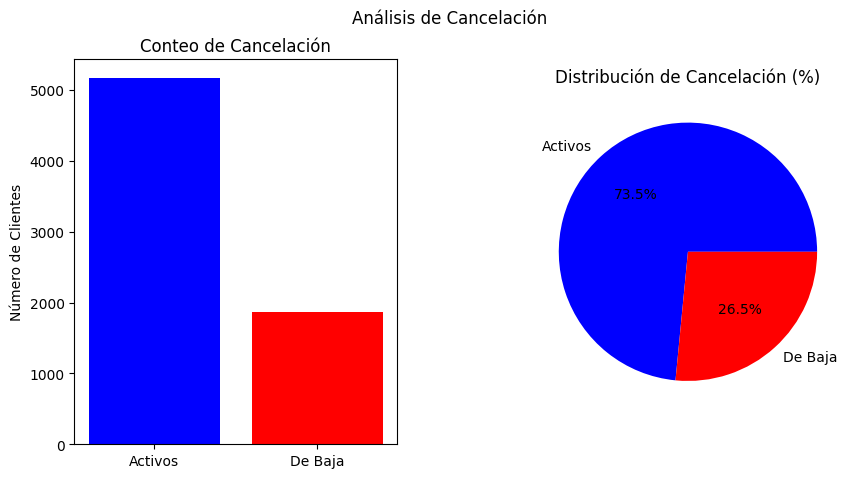

In [55]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada categoría en Cancelacion
cancelacion_counts = df_telecomx1['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Mapear valores para etiquetas en los gráficos
cancellation_labels = {'no': 'Activos', 'yes': 'De Baja'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_labels)

# Crear figura con dos subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4)

# Título general
fig.suptitle('Análisis de Cancelación')

# Gráfico de barras
axs[0].bar(cancelacion_counts['Cancelacion_Text'], cancelacion_counts['Count'], color=['blue', 'red'])
axs[0].set_title('Conteo de Cancelación')
axs[0].set_ylabel('Número de Clientes')

# Gráfico de pastel
axs[1].pie(cancelacion_counts['Count'], labels=cancelacion_counts['Cancelacion_Text'], autopct='%1.1f%%', colors=['blue', 'red'])
axs[1].set_title('Distribución de Cancelación (%)')

plt.show()


## Recuento de evasión por variables categóricas

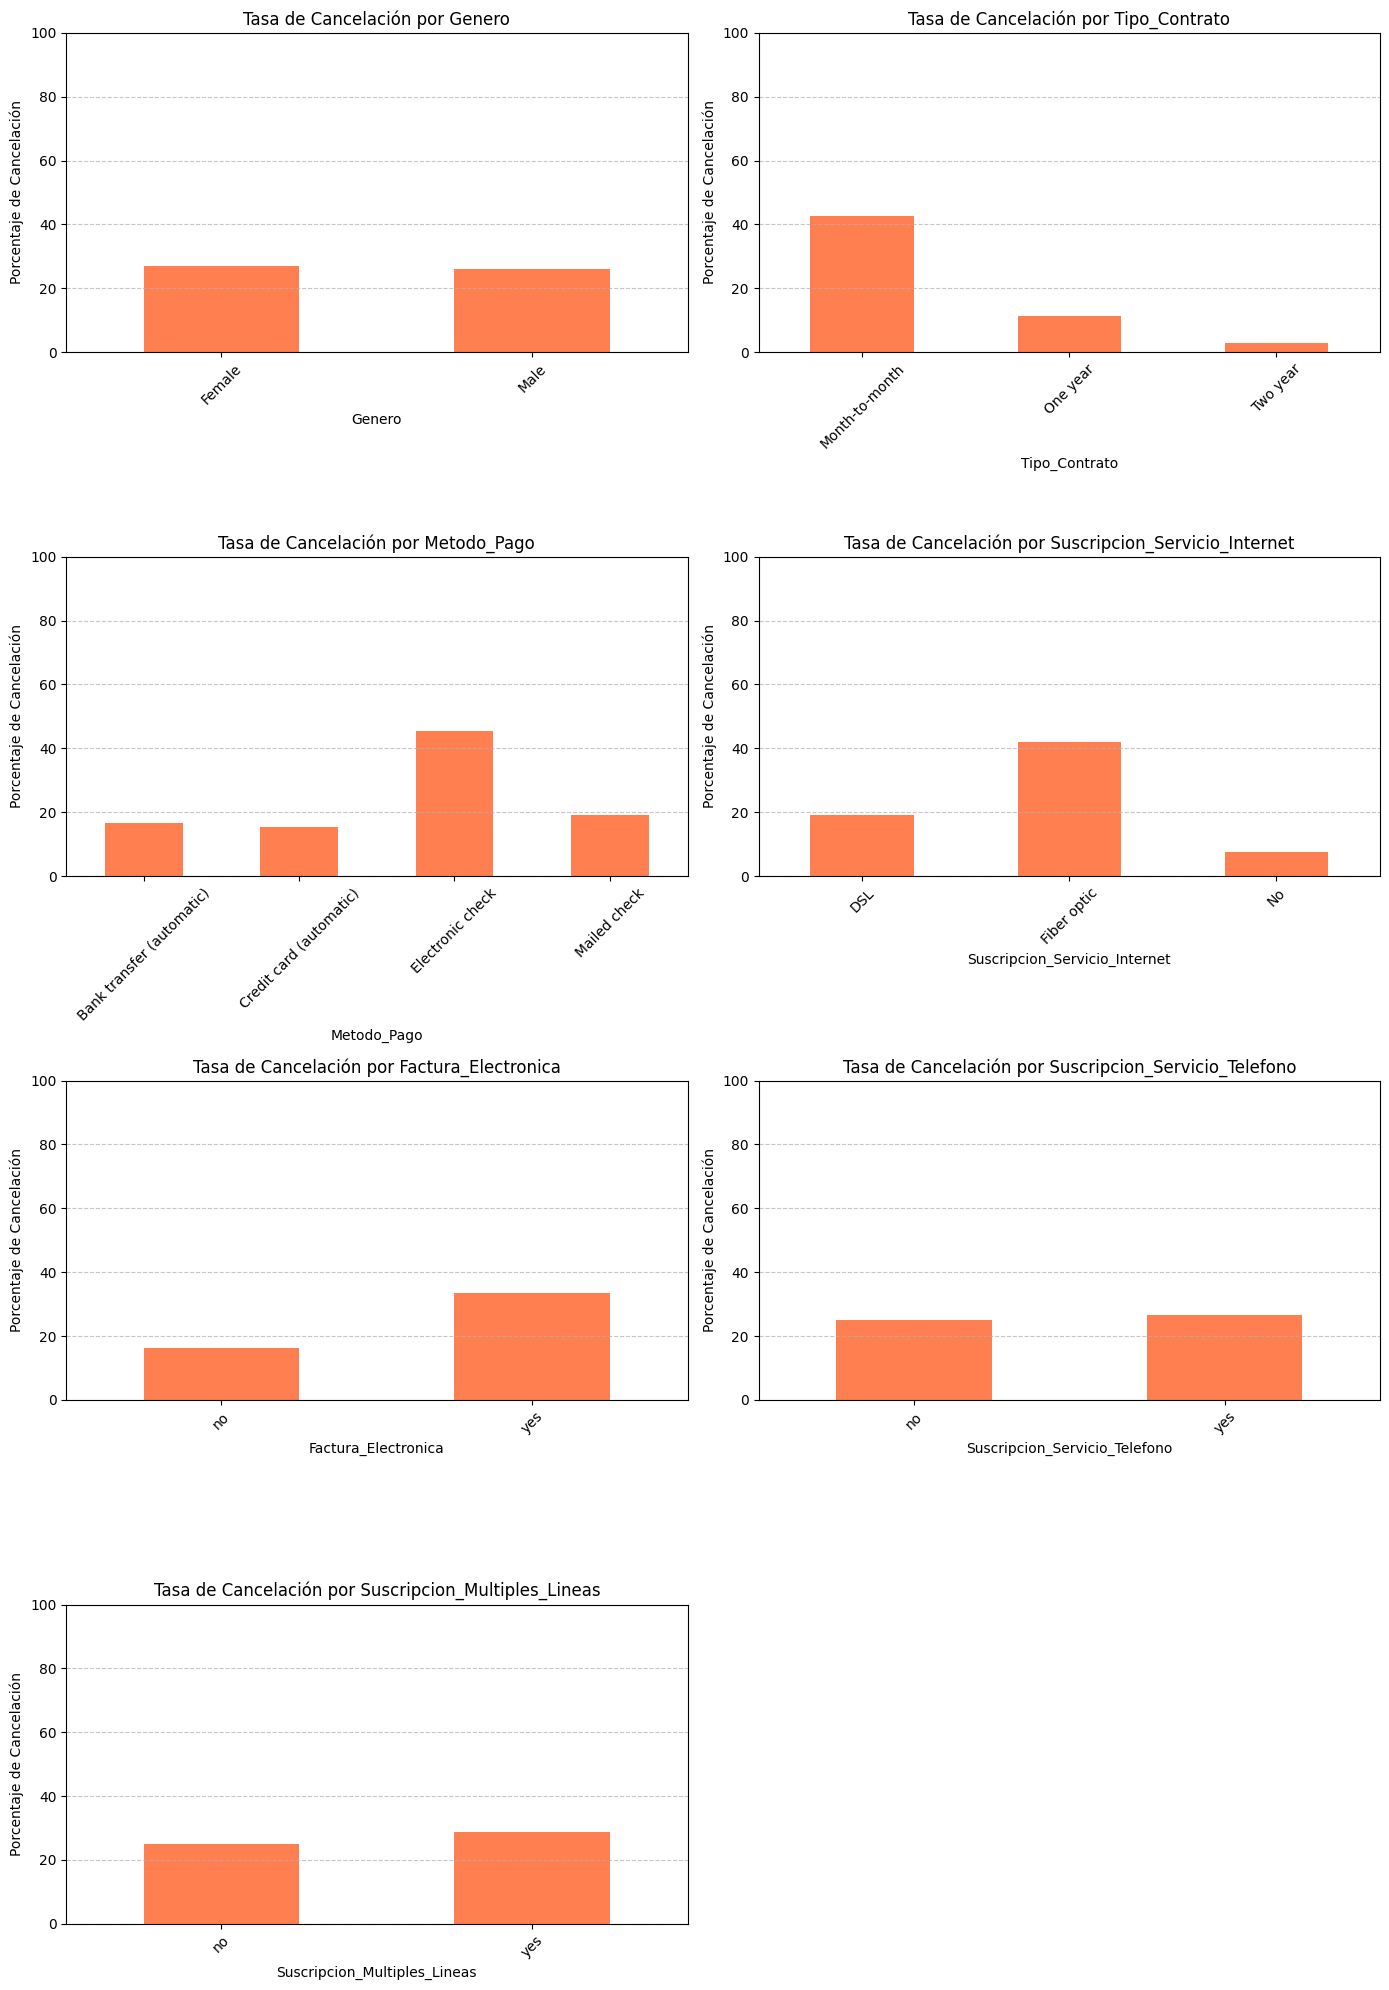

In [58]:
import matplotlib.pyplot as plt
import math

def plot_cancelacion_por_variable(df, columnas):
    n = len(columnas)
    filas = math.ceil(n / 2)  # número de filas, 2 gráficos por fila

    fig, axs = plt.subplots(filas, 2, figsize=(14, 5 * filas))
    axs = axs.flatten()  # aplanar el array para indexar fácilmente

    for i, col in enumerate(columnas):
        tabla = pd.crosstab(df[col], df['Cancelacion'], normalize='index') * 100
        if 'yes' not in tabla.columns:
            tabla['yes'] = 0
        tasa_cancel = tabla['yes']

        tasa_cancel.plot(kind='bar', color='coral', ax=axs[i])
        axs[i].set_title(f'Tasa de Cancelación por {col}')
        axs[i].set_ylabel('Porcentaje de Cancelación')
        axs[i].set_xlabel(col)
        axs[i].set_ylim(0, 100)
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Si el número de gráficos es impar, borramos el último subplot vacío
    if n % 2 != 0:
        fig.delaxes(axs[-1])

    plt.tight_layout()
    plt.show()

# Variables categóricas que quieres analizar
variables_categoricas = [
    'Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Suscripcion_Servicio_Internet',
    'Factura_Electronica', 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas'
]

plot_cancelacion_por_variable(df_telecomx1, variables_categoricas)

## Conteo de evasión por variables numéricas

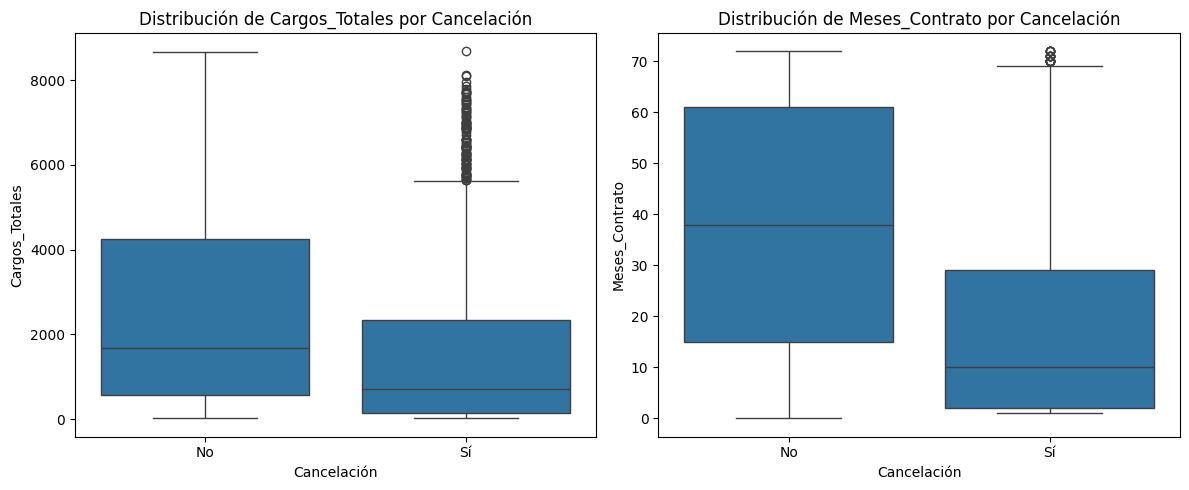

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a analizar
num_vars = ['Cargos_Totales', 'Meses_Contrato']

plt.figure(figsize=(12, 5))

for i, var in enumerate(num_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Cancelacion', y=var, data=df_telecomx1)
    plt.title(f'Distribución de {var} por Cancelación')
    plt.xlabel('Cancelación')
    plt.ylabel(var)
    plt.xticks([0,1], ['No', 'Sí'])  # Suponiendo que 'Cancelacion' tiene 0/1 o 'no'/'yes', ajusta según tu DF

plt.tight_layout()
plt.show()


# Informe Final – Análisis de Evasión de Clientes en TelecomX

## 1. Introducción

El presente análisis tuvo como objetivo identificar patrones asociados a la evasión (churn) de clientes en la empresa TelecomX. La evasión representa una pérdida directa de ingresos y reduce las oportunidades futuras para la empresa, por lo que comprender las causas detrás de la cancelación del servicio es fundamental para mejorar la retención y la rentabilidad.

## 2. Proceso de Análisis y Limpieza de Datos

Los datos fueron extraídos desde un repositorio público en formato JSON. Debido a su estructura anidada, se realizó un proceso de normalización para transformar los datos en un formato tabular adecuado para el análisis.

Posteriormente, se detectaron y corrigieron posibles inconsistencias:

No se encontraron datos duplicados.

Se eliminaron filas con valores vacíos en la variable principal de interés (churn).

Se imputaron valores faltantes en las columnas numéricas utilizando la mediana.

Se estandarizaron variables categóricas para asegurar consistencia en su interpretación.

Además, se crearon variables derivadas para enriquecer el análisis, como la estimación del gasto diario promedio por cliente.

## 3. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio permitió identificar comportamientos y tendencias importantes en la tasa de evasión:

La tasa general de cancelación fue de aproximadamente un 26.5%, lo que indica que más de uno de cada cuatro clientes decide abandonar el servicio.

La tasa de evasión varió significativamente según variables categóricas como el tipo de contrato, método de pago, y la suscripción a servicios de internet y teléfono.

Los clientes con contratos mensuales y aquellos que usan métodos de pago electrónicos presentaron mayores tasas de cancelación.

Clientes con servicios de fibra óptica también mostraron mayor propensión a cancelar.

Variables numéricas como el tiempo en contrato y los cargos totales mostraron diferencias claras entre clientes activos y los que cancelaron, con clientes que abandonan tendiendo a tener menor antigüedad y cargos menores.

## 4. Conclusiones

La evasión en TelecomX es un fenómeno considerable que requiere atención inmediata.

Los contratos de largo plazo y la facturación tradicional parecen funcionar como factores protectores contra la cancelación.

Los métodos de pago y el tipo de servicio contratado son variables clave para entender el comportamiento de los clientes.

El análisis sugiere que la intervención temprana, especialmente en clientes con menor tiempo en contrato, podría reducir la tasa de churn.

## 5. Recomendaciones

Promover contratos con duración más larga mediante incentivos claros para aumentar la retención.

Realizar campañas personalizadas enfocadas en clientes con mayor riesgo de cancelación según sus características.

Optimizar los métodos de pago digitales para hacerlos más seguros y confiables.

Desarrollar modelos predictivos basados en las variables identificadas para anticipar la evasión y tomar acciones preventivas.

Analista: Emanuel Acosta

Programa: ONE + Alura LATAM

Especialización: Ciencia de Datos


